In [52]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#importing warning
import warnings
warnings.filterwarnings("ignore")

In [54]:
# loading dataset
df=pd.read_csv("Electric_Production.csv")

In [51]:
#peak of the data
df.head(24)

,Sales
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [5]:
#making date column as a index column
df=pd.read_csv("Electric_Production.csv",index_col="DATE",parse_dates=True)

In [6]:
#changing the name of the sales data
df.rename(columns={'IPG2211A2N': 'Sales'}, inplace=True)

In [7]:
#peak of the data
df.head()

,Sales
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [8]:
#tail of the data
df.tail()

,Sales
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [9]:
#shape of the data
df.shape

(397, 1)

In [10]:
#cheaking null values
df.isnull().sum()

Sales    0
dtype: int64

In [11]:
#cheaking duplicated values
df.duplicated().sum()

0

<Axes: xlabel='DATE'>

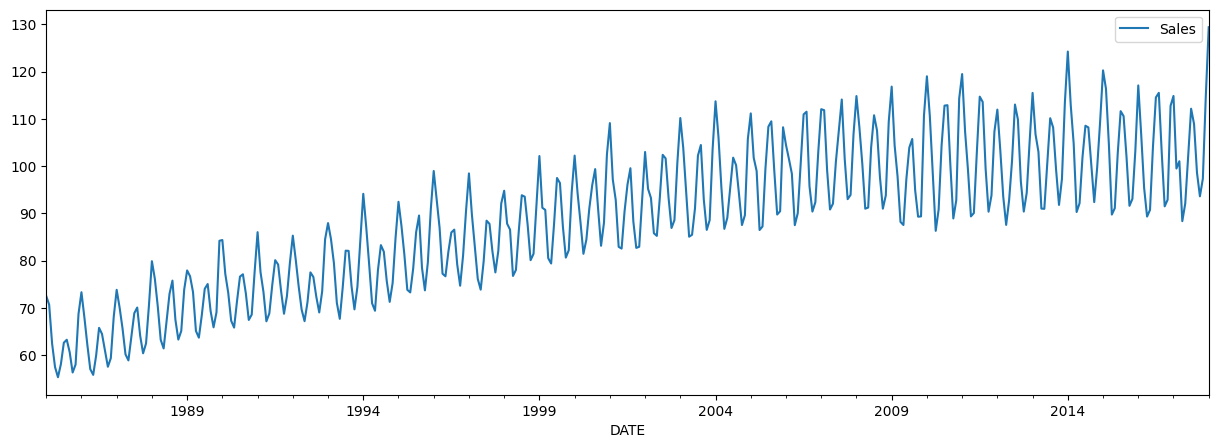

In [12]:
#plotting the data
df.plot(figsize=(15,5))

In [13]:
#in the above data we can see that there is seasonal trend is present so we have to use seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
#tsa=trend seasonal analysis

In [14]:
#set the index freq as month
df.index.freq="MS"

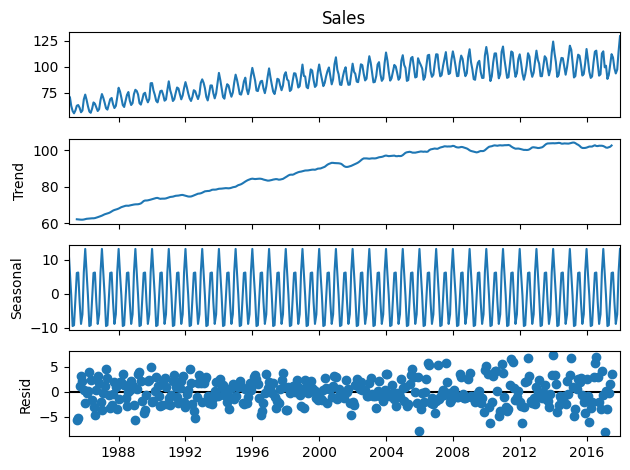

In [15]:
# Decompose the time series into trend, seasonal, and residual components
results = seasonal_decompose(df['Sales'])
results.plot();
     


In [16]:
#cheaking length of the dataset
len(df)

397

In [17]:
#train test split
train = df.iloc[:384]
test = df.iloc[384:396]

In [18]:
train.tail()

,Sales
DATE,
2016-08-01,115.5159
2016-09-01,102.7637
2016-10-01,91.4867
2016-11-01,92.8900
2016-12-01,112.7694


In [19]:
test.head()

,Sales
DATE,
2017-01-01,114.8505
2017-02-01,99.4901
2017-03-01,101.0396
2017-04-01,88.3530
2017-05-01,92.0805


In [20]:
# we can see here range of the sales value is wide i.e difference between first and last value is high so we need to be use minmax scalar 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
     

In [21]:
#fitting the transform of minmax scalar
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
scaled_train[:4]

array([[0.24934943],
       [0.22275812],
       [0.10349754],
       [0.03127801]])

In [23]:
scaled_test

array([[0.86358533],
       [0.64077645],
       [0.66325258],
       [0.47922825],
       [0.53329717],
       [0.6794058 ],
       [0.82446859],
       [0.77772346],
       [0.62808856],
       [0.55553686],
       [0.60952889],
       [0.86170978]])

In [24]:
#importing timeseries generator to creating the batches
from keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# define generator for 3 months as input and 4th month as output
n_input = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [26]:
len(generator)

381

In [27]:
#output of the first batch
X,y = generator[0]
X.ravel(),y

(array([0.24934943, 0.22275812, 0.10349754]), array([[0.03127801]]))

In [28]:
X.shape

(1, 3, 1)

In [29]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
#adding the layer to reducing the dimensions 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
     

In [31]:
#using the sequential model
model = Sequential()
model.add(LSTM(1000, activation='relu', input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
#fitting the model
model.fit(generator,epochs=40)
     

Epoch 1/40

372/372 [==============================] - 62s 152ms/step - loss: 0.0194
Epoch 2/40
372/372 [==============================] - 59s 157ms/step - loss: 0.0073
Epoch 3/40
372/372 [==============================] - 54s 144ms/step - loss: 0.0043
Epoch 4/40
372/372 [==============================] - 51s 138ms/step - loss: 0.0048
Epoch 5/40
372/372 [==============================] - 50s 133ms/step - loss: 0.0038
Epoch 6/40
372/372 [==============================] - 50s 134ms/step - loss: 0.0032
Epoch 7/40
372/372 [==============================] - 52s 141ms/step - loss: 0.0031
Epoch 8/40
372/372 [==============================] - 55s 148ms/step - loss: 0.0035
Epoch 9/40
372/372 [==============================] - 55s 147ms/step - loss: 0.0036
Epoch 10/40
372/372 [==============================] - 52s 140ms/step - loss: 0.0028
Epoch 11/40
372/372 [==============================] - 56s 149ms/step - loss: 0.0028
Epoch 12/40
372/372 [==============================] - 52s 140ms/step - l

In [33]:
#calculate the loss 
loss=model.history.history["loss"]
     

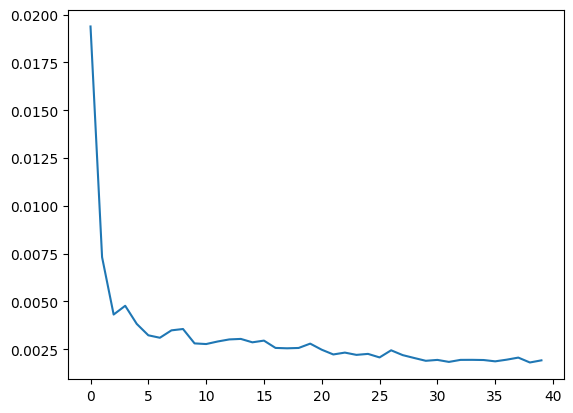

In [34]:
#plot the loss
plt.plot(loss)
     

In [35]:
#making the last train batch
last_train_batch = scaled_train[-12:]

In [36]:
last_train_batch 

array([[0.89597881],
       [0.74490643],
       [0.58079223],
       [0.49333331],
       [0.5138077 ],
       [0.70673834],
       [0.85907705],
       [0.87323723],
       [0.68826135],
       [0.52468385],
       [0.5450393 ],
       [0.83339812]])

In [37]:
#reshaping the last train batch
last_train_batch=last_train_batch.reshape((1,12,1))

In [38]:
#predictions for the last train batch
model.predict(last_train_batch)

1/1 [==============================] - 0s 457ms/step


array([[0.95091826]], dtype=float32)

In [39]:
scaled_test[0]

array([0.86358533])

In [40]:
#we need to convert the prediction into the list 
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1,12,1))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_pred.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     


1/1 [==============================] - 0s 46ms/step


In [41]:
test_pred

[array([0.95091826], dtype=float32),
 array([0.79965454], dtype=float32),
 array([0.62757295], dtype=float32),
 array([0.4851654], dtype=float32),
 array([0.5341296], dtype=float32),
 array([0.7380376], dtype=float32),
 array([0.8706879], dtype=float32),
 array([0.83332956], dtype=float32),
 array([0.68015414], dtype=float32),
 array([0.53111875], dtype=float32),
 array([0.5522351], dtype=float32),
 array([0.78670484], dtype=float32)]

In [42]:
test.head()

,Sales
DATE,
2017-01-01,114.8505
2017-02-01,99.4901
2017-03-01,101.0396
2017-04-01,88.3530
2017-05-01,92.0805


In [43]:
#inverse transformation of the predicted values into the original values
true_pred = scaler.inverse_transform(test_pred)

In [44]:
test['Predicted Production'] = true_pred

In [45]:
test.head()

,Sales,Predicted Production
DATE,,
2017-01-01,114.8505,120.871214
2017-02-01,99.4901,110.443124
2017-03-01,101.0396,98.579854
2017-04-01,88.3530,88.762305
2017-05-01,92.0805,92.137889


<Axes: xlabel='DATE'>

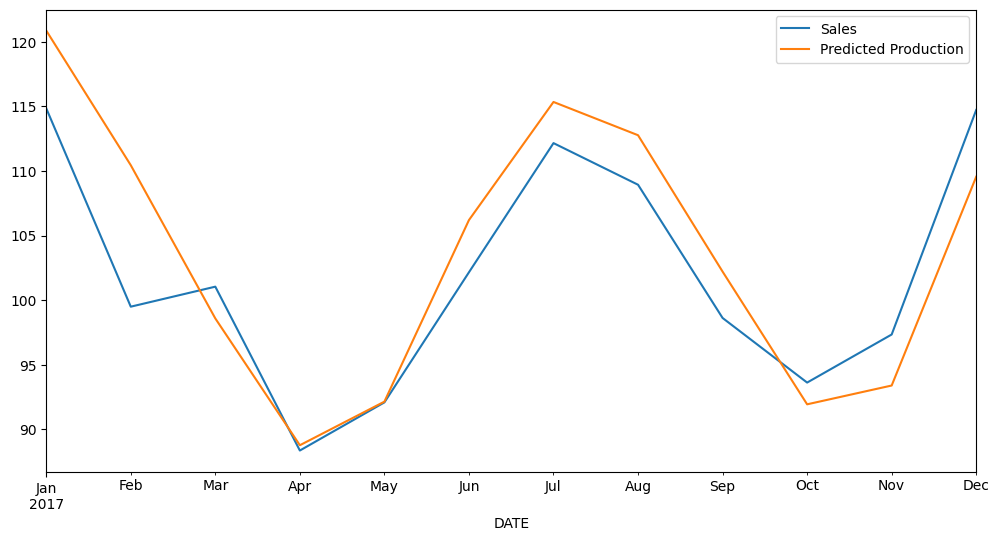

In [46]:
#plotting the graph of the orginal sales and predicted sales 
test.plot(figsize=(12,6))

In [47]:
#calculating the mean squared error 
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Sales'],test['Predicted Production']))
print(rmse)

4.669774745175916
